# FRAUDE DE TARJETAS DE CREDITO

Informacion de nuestras variables:


**distancia_desde_casa**: la distancia desde la casa donde se realizó la transacción.

**distancia_desde_last_transacción**: la distancia desde la última transacción que ocurrió.

**ratio_to_median_purchase_price**: relación entre la transacción del precio de compra y el precio de compra medio.

**repeat_retailer**: la transacción se realizó desde el mismo minorista.

**used_chip** - Es la transacción a través de chip (tarjeta de crédito).

**used_pin_number**: la transacción se realizó mediante el uso de un número PIN.

**online_order**: la transacción es un pedido en línea.

**fraude** - ¿Es la transacción fraudulenta?

#### Librerias

In [1]:
# Analisis exploratorio y manejo de datos
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
import plotly.express as px


# Estandarizacion
from sklearn.preprocessing import StandardScaler

# Train test split para entrenar los datos
from sklearn.model_selection import train_test_split

# Algoritmos de Machine Learning
from sklearn.neighbors import KNeighborsClassifier

# Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score

# Warning
import warnings
warnings.filterwarnings("ignore")

## Introducción al dataset card_transdata

In [2]:
data = pd.read_csv('card_transdata.csv')
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [3]:
data.shape

(1000000, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


# 1) Data Cleaning

##### 1.1) Revisar valores duplicados.

##### 1.2) Verificar los valores nulos.

##### 1.3) Outliers o valores atipicos.

##### 1.4) Cambiar el tipo de dato de las variables categórica .

##### 1.1) Eliminar los valores duplicados.

In [5]:
# Creamos una nueva variable para separarla de la original.
data_cleaning = data

In [6]:
print(f'Filas y columnas sin eliminar duplicados:\n{data_cleaning.shape}')
data_cleaning.drop_duplicates(inplace=True)
print(f'Filas y columnas eliminando los valores duplicados:\n{data_cleaning.shape}')

Filas y columnas sin eliminar duplicados:
(1000000, 8)
Filas y columnas eliminando los valores duplicados:
(1000000, 8)


No tenemos datos duplicados en el dataset.

##### 1.2) Revisar los valores nulos en el dataset.

In [7]:
data_cleaning.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
data_cleaning.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

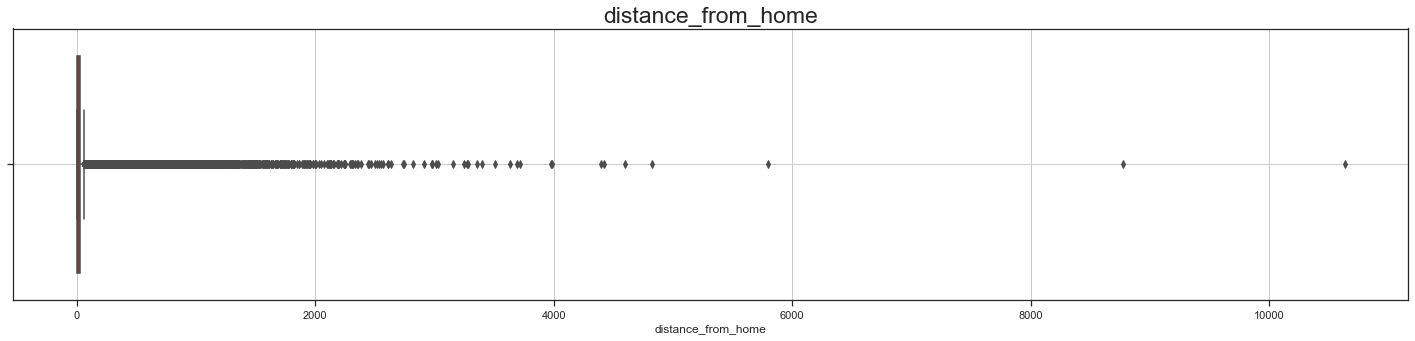

Valores entre el mínimo y el máximo
0.0048743850667442 3.878007992837444 9.967760078697681 25.743985056553438 259.9438981402364
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


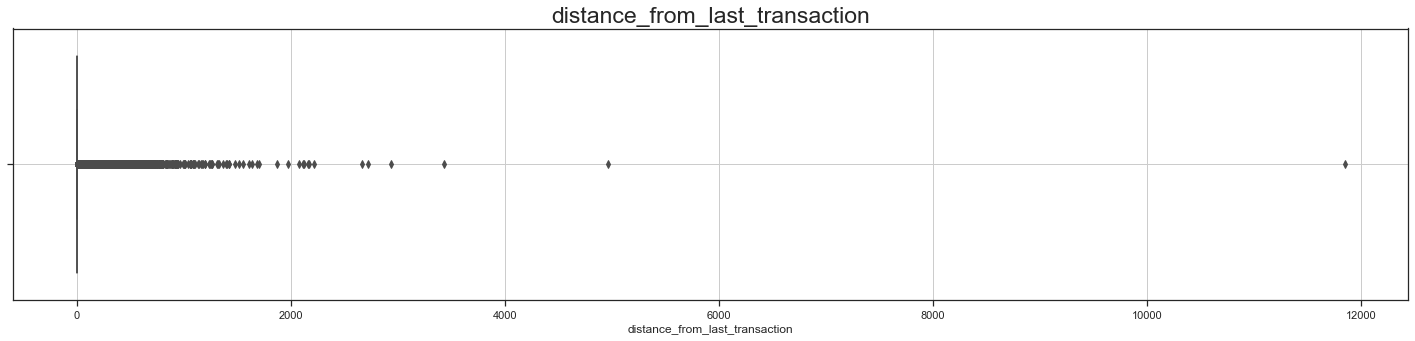

Valores entre el mínimo y el máximo
0.000118281615244 0.29667064195987203 0.9986501239499769 3.355747690188531 65.7256059845316
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


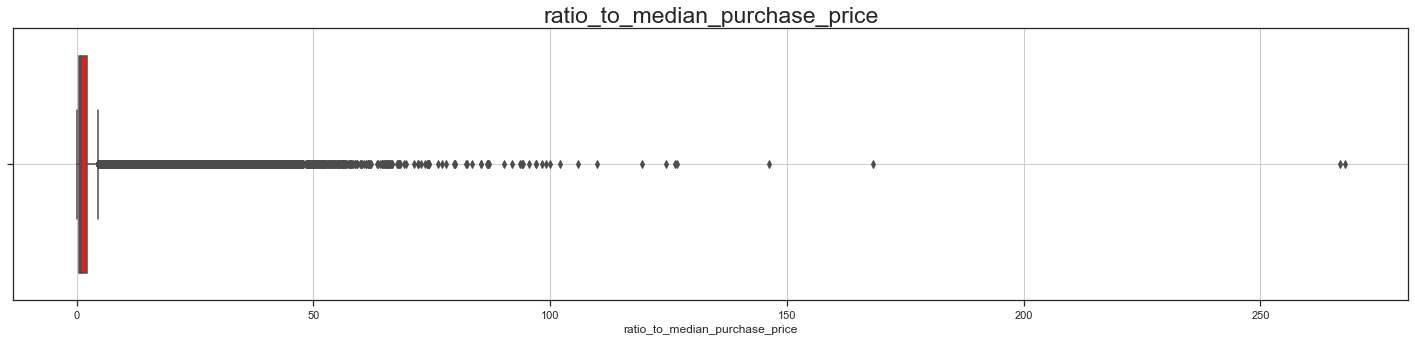

Valores entre el mínimo y el máximo
0.004399239615964 0.4756733234301026 0.9977169368730889 2.096370265022636 12.794085597651492
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [9]:
variables_cuantitativas = ['distance_from_home', 'distance_from_last_transaction',
                           'ratio_to_median_purchase_price']

for i in variables_cuantitativas:
    plt.figure(figsize=(25,5))
    plt.title(i, fontsize=23)
    sns.boxplot(data=data_cleaning, x=data_cleaning[i], color='red')
    plt.grid(True)
    plt.show()
    print('Valores entre el mínimo y el máximo')
    print(np.min(data_cleaning[i]), np.quantile(data_cleaning[i], 0.25), np.median(data_cleaning[i]), np.quantile(data_cleaning[i], 0.75), np.quantile(data_cleaning[i], 0.99))
    print('-'*381)

Tenemos un dataset con una población de 1.000.000. Si observamos las boxplot, podemos notar que tenemos demasiados valores atípicos. Como el objetivo de este proyecto es aplicar KNN (Vecinos cercanos), vamos a eliminar esos valores atípicos. Para eso, vamos a utilizar los bigotes inferiores y superiores como límite.

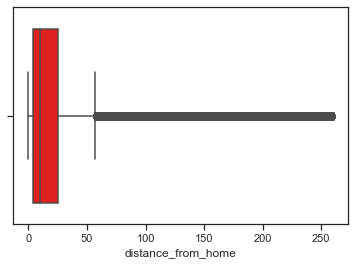

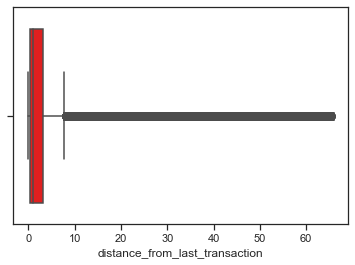

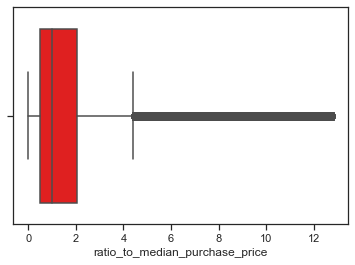

In [10]:
data_outliers = data_cleaning

for i in variables_cuantitativas:
    
    data_outliers = data_outliers[
        (data_outliers[i] >= np.min(data_outliers[i])) & (data_outliers[i] <= np.quantile(data_outliers[i], 0.99))]
    
    sns.boxplot(data=data_outliers, x=data_outliers[i], color='red')
    plt.show()
    
data_outliers.shape
data_cleaning = data_outliers

Podemos ver que ya podemos ver la distribución de los datos dentro de las boxplot. Si bien seguimos teniendo valores atípicos (debido a la eliminación del resto), podemos pensar que dentro del dataset, son valores que pueden resultar correctos o reales.

De tener 1.000.000 de datos, pasamos a tener 970.299.


##### 1.4) Cambiar el tipo de dato de las variables categórica .

In [11]:
variables = ['repeat_retailer', 'used_chip',
            'used_pin_number', 'online_order', 'fraud']


for i in variables:
    data_cleaning[i] = data_cleaning[i].astype('int64')

## 2) EDA (ANÁLISIS EXPLORATORIO)

El objetivo de este análisis es comparar las variables independientes con la dependiente (fraud) y crear un modelo de predicción que pueda identificar futuros fraudes con las tarjetas de crédito. Para eso vamos a analizar una por una y ver la correlación que hay entre ellas.

##### 2.1) Observar que tipos de datos vamos a manejar.

##### 2.2) Estadística descriptiva y visualización.

##### 2.3) Correlación entre las variables y la variable dependiente.

##### 2.4) Observar si los datos de la columna fraud están desbalanceados. 

##### 2.5) Conclusión del análisis.


##### 2.1) Tipos de datos.

In [12]:
data_cleaning.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int64
used_chip                           int64
used_pin_number                     int64
online_order                        int64
fraud                               int64
dtype: object

##### 8 Variables.

**Tipo flotante**:
    
    - distance_from_home   
    - distance_from_last_transaction  
    - ratio_to_median_purchase_price
    
**Tipo entero**:

    - repeat_retailer                     
    - used_chip                           
    - used_pin_number                     
    - online_order      
    - fraud                               
    

##### 2.2) Estadística descriptiva y visualización de las variables.

In [13]:
data_cleaning.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,970299.0,22.133860,33.587507,0.004874,3.833910,9.788774,24.903853,259.943888
distance_from_last_transaction,970299.0,3.560194,7.314351,0.000118,0.292369,0.976393,3.215192,65.761838
ratio_to_median_purchase_price,970299.0,1.640908,1.870932,0.004399,0.471572,0.984514,2.043787,12.795125
repeat_retailer,970299.0,0.880318,0.324589,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,970299.0,0.350388,0.477092,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,970299.0,0.100630,0.300838,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,970299.0,0.650578,0.476788,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,970299.0,0.074380,0.262389,0.000000,0.000000,0.000000,0.000000,1.000000


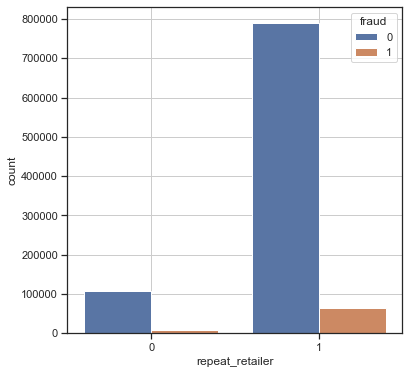

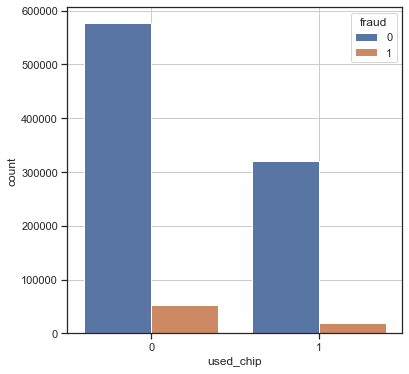

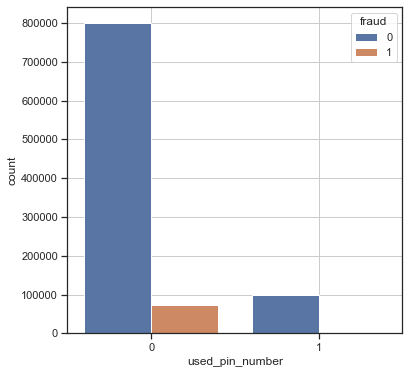

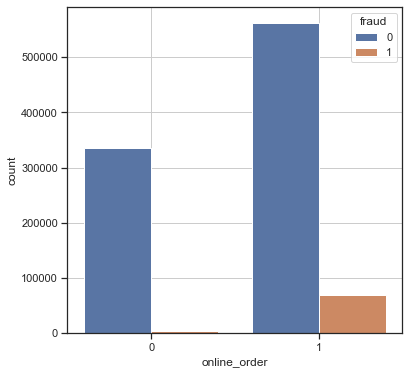

In [14]:
v_binarias = ['repeat_retailer', 'used_chip',
            'used_pin_number', 'online_order']

for i in v_binarias:
    plt.figure(figsize=(6,6))
    sns.countplot(data=data_cleaning, x=i, hue='fraud')
    plt.grid(True)
    plt.show()

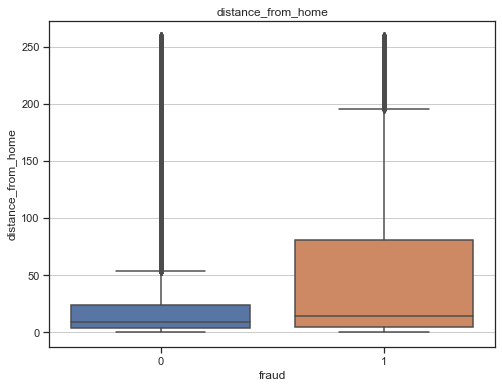

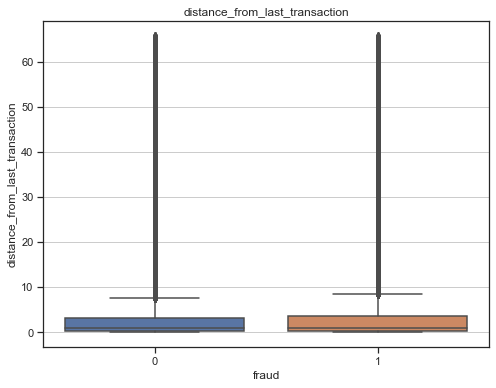

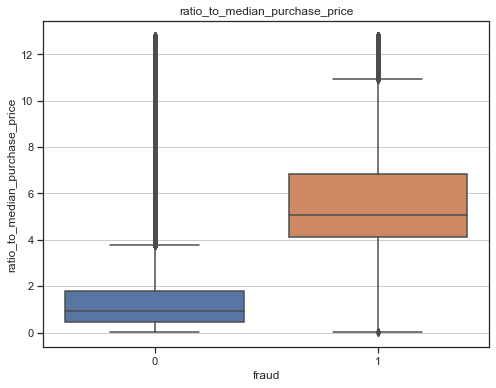

In [15]:
for i in variables_cuantitativas:
    plt.figure(figsize=(8,6))
    plt.title(i)
    plt.grid(True)
    sns.boxplot(data=data_cleaning, x='fraud', y=i)
    plt.show()

##### 2.3) Correlación entre las variables

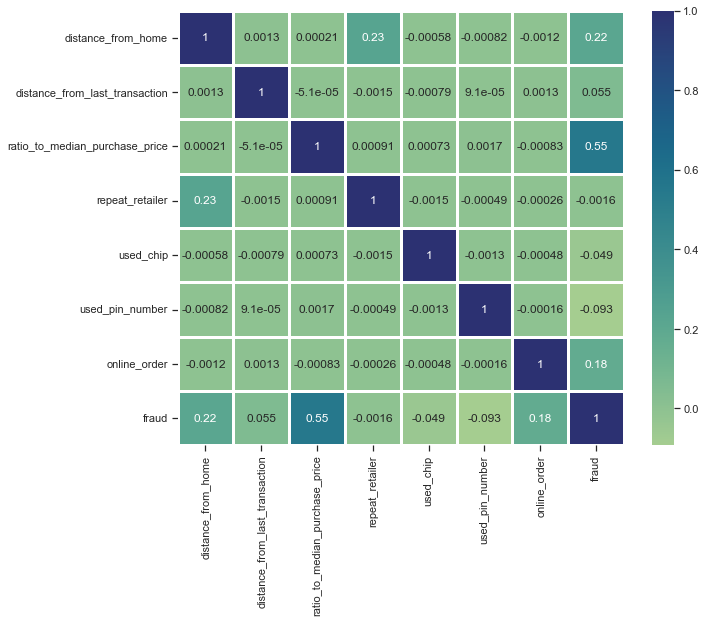

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data_cleaning.corr(), annot=True, linewidths=3, cmap='crest')
plt.show()

##### 2.4) Observación de los datos desbalanceados.

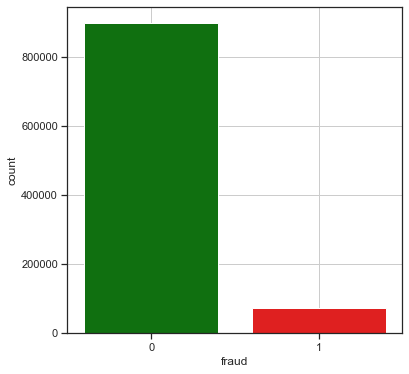

Valores de la variable fraud:
0    898128
1     72171
Name: fraud, dtype: int64
None


In [17]:
palette_fraud = ['green', 'red']

def grafico_balance(dataset):
    plt.figure(figsize=(6,6))
    sns.countplot(data=dataset, x='fraud', palette=palette_fraud)
    plt.grid()
    plt.show()
    print(f'Valores de la variable fraud:\n{dataset.fraud.value_counts()}')
    
print(grafico_balance(data_cleaning))

##### 2.5) Resultados del análisis exploratorio.

Manejamos 8 variables de las cuales 3 son de tipo flotantes y el resto enteros.

Variables cuantitativas continuas:

    - distance_from_home
    - distance_from_last_transaction
    - ratio_to_median_purchase_price
    
Variables categóricas:

    - repeat_retailer
    - used_chip
    - used_pin_number
    - online_order
    - fraud
    
En los gráficos de barras podemos decir que en un pequeño porcentaje el fraude se cometió en el mismo minorista donde se realizó una compra y también se cometen por medio de internet o en línea.

Si observamos la matriz de correlación, podemos ver que hay una correlación de 0.55 entre nuestra variable **fraud** y **ratio_to_median_purchase_price**. En el gráfico de cajas, notamos que casi el 100% de los datos dentro de fraude están distribuidos.

Por último, podemos ver en el gráfico de barras que los datos están desbalanceados. Por lo tanto, usaremos una técnica de sub-muestreo para balancearlos y así poder implementar el algoritmo de una forma más eficiente. 

## 3) Preparación de los datos.

##### 3.1) Aplicación de técnica de sub-muestreo para balancear los datos.
##### 3.2) Estandarización de los valores.
##### 3.3) División de los datos en entrenamiento y testeo.


##### 3.1) Sub-muestreo. Técnica de Undersampling

Para ello, tendríamos que eliminar una gran cantidad de datos que no hayan sufrido algún tipo de fraude. Somos conscientes que haciendo esto, perderemos información. Sin embargo, tenemos un dataset que contiene una gran cantidad de datos.

Si observamos nuevamente los gráficos de barras, podemos ver que tenemos 72.171 individuos que sufrieron fraude. Por el otro lado, tenemos un total de 898.128 que no lo sufrieron. Por lo que tendriamos que igualar esa cantidad.

Para ello utilizaremos la herramienta que nos proporciona imblearn, llamada under_sampling. De esta librería importamos RandomUnderSampler que se ocupará de eliminar de forma aleatoria los datos de nuestra variable target con el objetivo de igualar en un 50/50 aquellos que sufrieron fraude. De esta manera, podemos usar la métrica accuracy (precisión) para observar que nuestro modelo funciona correctamente.




#### Undersampling

In [18]:
# Instalamos imblearn

#!pip install imblearn

In [19]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [20]:
# Generamos nuestras variables X e y.

y_under_sampling = data_cleaning['fraud'].values
X_under_sampling = data_cleaning.drop(columns='fraud').values

Con los códigos que tenemos en esta línea, el algoritmo se encarga de igualar la cantidad de nuestra variable fraud. 
Así tendremos un dataset balanceado.


In [21]:
random_under_sampler = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = random_under_sampler.fit_resample(X_under_sampling, y_under_sampling)
print(sorted(Counter(y_resampled).items()), y_resampled.shape)

[(0, 72171), (1, 72171)] (144342,)


##### 3.2) Estandarización de algunas variables.




In [22]:
X_resampled = StandardScaler().fit_transform(X_resampled)

##### 3.3) División de los datos en entrenamiento y test.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (115473, 7)
X_test: (28869, 7)
y_train: (115473,)
y_test: (28869,)


Para saber la cantidad de K que vamos a utilizar, veamos en una gráfica el nivel de precisión que tendremos según los vecinos que utilicemos.

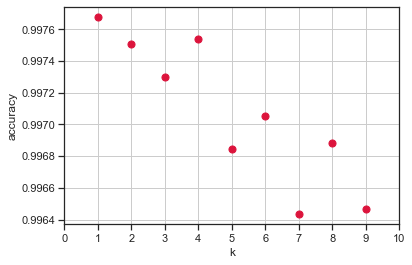

In [24]:
k_range = range(1, 10)
scores = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k, p=1)
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))
plt.figure()
plt.grid(True)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores, marker = 'o', s = 50, color = 'Crimson')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.show()

Si vemos, no hay diferencia en la precisión. Todas nos dan un porcentaje de 0.99%. Sin embargo, al tener 2 grupos en el dataset (fraude o no), usaremos un número impar de vecinos cercanos. En esta ocasión usaremos 3.

[[14320    76]
 [    2 14471]]


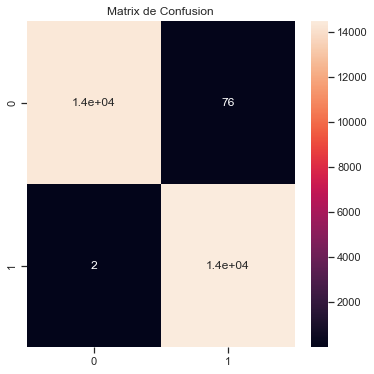

Reporte:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14396
           1       0.99      1.00      1.00     14473

    accuracy                           1.00     28869
   macro avg       1.00      1.00      1.00     28869
weighted avg       1.00      1.00      1.00     28869



In [25]:
KNN = KNeighborsClassifier(n_neighbors=3, p=1)
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

# Matrix de confusion

plt.figure(figsize=(6,6))
print(confusion_matrix(y_test, y_pred))
plt.title('Matrix de Confusion')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

reporte = classification_report(y_test, y_pred)
print(f'Reporte:\n\n{reporte}')

Si bien el modelo tiene una precisión de 1.00, podemos ver que en la matriz de confusión que el algoritmo predice operaciones fraudulentas como no fraudulentas (92 transacciones.) Por muy pocos que sean, esto generaría problemas para la empresa y desconfianza, perdiendo así a algunos clientes que hayan operado con la tarjeta toda su vida.

Podríamos tener dos soluciones:

    - En primer lugar, tratar de crear un modelo que trate de predecir aquellas transacciones fraudulentas, y en el peor de los casos, clasificar como fraudulentas aquellas que no lo son. En otras palabras, invertir la situación.
    
    - En segundo lugar, ver cómo podemos solucionar el problema de aquellos clientes que sufrieron un fraude para que sigan teniendo confianza en la empresa y no vayan a la competencia. Esto podría solucionarse dándoles atención personalizada en todo el proceso, asegurando que a pesar del inconveniente, se le devolverá aquello que perdió en ese fraude. 

## 4) Probando con nuevos modelos de aprendizaje.

Vamos a probar con diferentes algoritmos para ver si logramos tener un mejor modelo que no permita pasar ningun tipo de fraude.

In [26]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier

In [27]:
#Creamos un diccionario que contenga los algoritmos.

algoritmos = {
    'Bayes':GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(),
    'LDA':LDA(),
    'Soporte_vectorial':svm.SVC(),
    'Red_Neuronal': MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
}

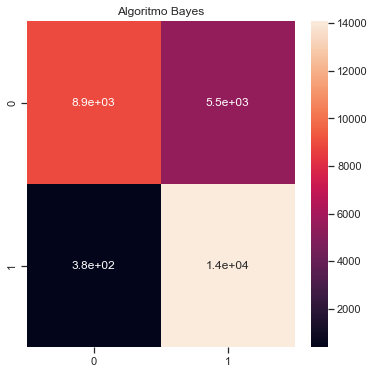

[[ 8933  5463]
 [  384 14089]]
              precision    recall  f1-score   support

           0       0.96      0.62      0.75     14396
           1       0.72      0.97      0.83     14473

    accuracy                           0.80     28869
   macro avg       0.84      0.80      0.79     28869
weighted avg       0.84      0.80      0.79     28869

------------------------------


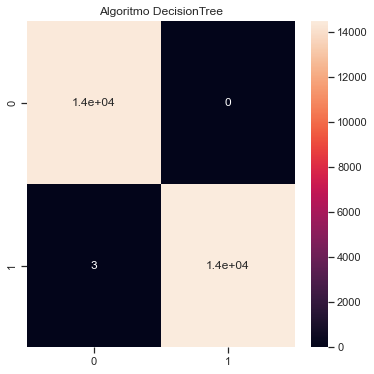

[[14396     0]
 [    3 14470]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14396
           1       1.00      1.00      1.00     14473

    accuracy                           1.00     28869
   macro avg       1.00      1.00      1.00     28869
weighted avg       1.00      1.00      1.00     28869

------------------------------


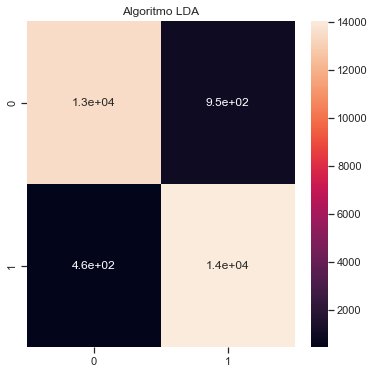

[[13449   947]
 [  457 14016]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     14396
           1       0.94      0.97      0.95     14473

    accuracy                           0.95     28869
   macro avg       0.95      0.95      0.95     28869
weighted avg       0.95      0.95      0.95     28869

------------------------------


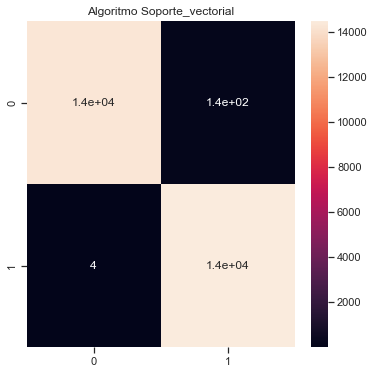

[[14257   139]
 [    4 14469]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14396
           1       0.99      1.00      1.00     14473

    accuracy                           1.00     28869
   macro avg       1.00      1.00      1.00     28869
weighted avg       1.00      1.00      1.00     28869

------------------------------


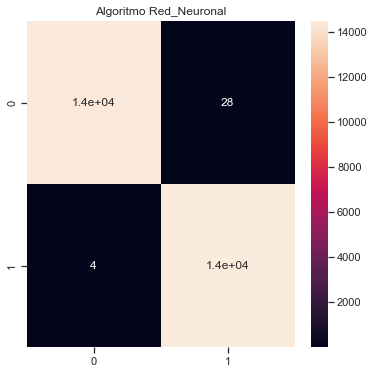

[[14368    28]
 [    4 14469]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14396
           1       1.00      1.00      1.00     14473

    accuracy                           1.00     28869
   macro avg       1.00      1.00      1.00     28869
weighted avg       1.00      1.00      1.00     28869

------------------------------


In [28]:
# Los entrenamos en un bucle

for i in algoritmos:
    algoritmo = algoritmos[i]
    algoritmo.fit(X_train, y_train)
    y_pr = algoritmo.predict(X_test)
    
    # Graficamos nuevamente la matriz de confusion
    
    plt.figure(figsize=(6,6))
    
    plt.title(f'Algoritmo {i}')
    cm_2 = confusion_matrix(y_test, y_pr)
    sns.heatmap(cm_2, annot=True)
    plt.show()
    print(confusion_matrix(y_test, y_pr))
    
    # Reporte
    report = classification_report(y_test, y_pr)
    print(report)
    print(30 * '-')

Si vemos la matriz de confusión del algoritmo de los árboles de decisión, podemos decir que es casi perfecto. Tenemos una precisión, recall y f1-score de 1.00. Hay 3 transacciones que fueron detectadas como fraude cuando no lo eran.

Como dijimos, es mejor detectar todos los fraudes para afianzar la seguridad del cliente para la empresa. Además, que solo se consideren 3 transacciones como fraude de forma errónea de 14.396 podemos decir que es algo positivo.


## Árboles de decisión

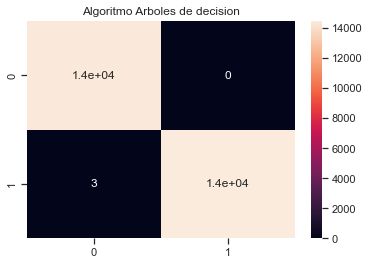

[[14396     0]
 [    3 14470]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14396
           1       1.00      1.00      1.00     14473

    accuracy                           1.00     28869
   macro avg       1.00      1.00      1.00     28869
weighted avg       1.00      1.00      1.00     28869



In [29]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

plt.title(f'Algoritmo Arboles de decision')
cm_tree = confusion_matrix(y_test, pred_tree)
sns.heatmap(cm_tree, annot=True)
plt.show()
print(confusion_matrix(y_test, pred_tree))

# Reporte
report_tree = classification_report(y_test, pred_tree)
print(report)

### Curva ROC Arboles decision vs Knn Vecinos cercanos.

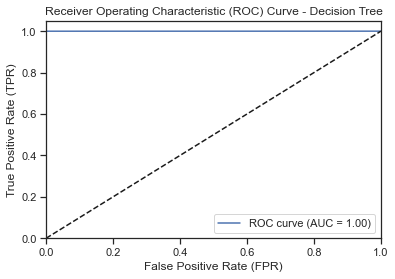

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

predicted_probs = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, predicted_probs)

auc = roc_auc_score(y_test, predicted_probs)

# Graficamos la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()


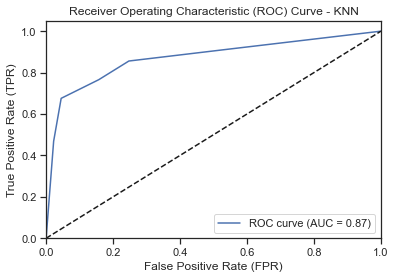

In [34]:
# Curva roc del modelo KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

predicted_probs = clf_knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, predicted_probs)

auc = roc_auc_score(y_test, predicted_probs)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.show()
